In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%run trial_history_calculations_functions.ipynb

#### <font color='darkorange'> Read the data 

In [28]:
runs=pd.read_csv('C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_no_baseline.csv')

#### <font color='darkorange'> Calculate the probability of error in current non-illuminated trials given previous condition

In [30]:
p_shift, counts_shift = compute_error_probabilities_and_count_trials(runs, 'stim_condition_shifted')

In [32]:
p_shift['stim_condition_shifted'].value_counts()

0.0    50
3.0    50
1.0    48
Name: stim_condition_shifted, dtype: int64

In [33]:
p_shift.head()

,group,rat,stim_condition,stim_condition_shifted,prob
0,CTRL,CTRL2,0,0.0,0.243902
1,CTRL,CTRL2,0,3.0,0.208333
2,CTRL,CTRL2,3,0.0,0.222222
3,CTRL,CTRL2,3,3.0,0.186047
4,CTRL,CTRL3,0,0.0,0.131579


#### <font color='darkorange'> Plot probability of error given previous condition

Text(0.5, 1.0, 'NpHR+')

<Figure size 1800x1200 with 0 Axes>

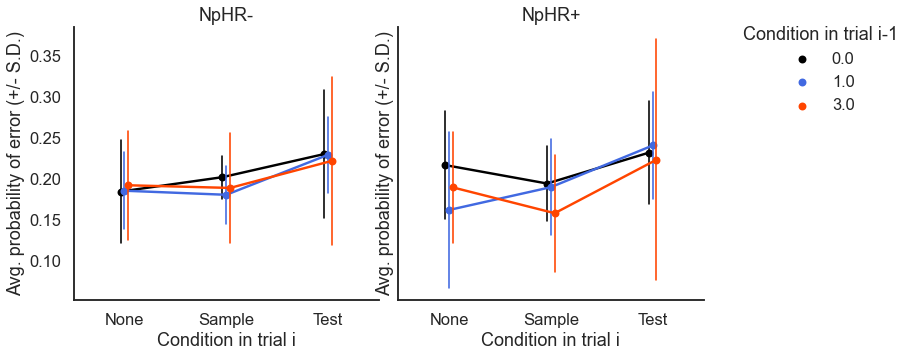

In [35]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)

g = sns.catplot(
    kind='point', data=p_shift,
    col='group', y='prob', 
    x='stim_condition', hue='stim_condition_shifted',
    dodge=True, ci='sd',
    errwidth=1.6, palette=['black', 'royalblue', 'orangered'], 
    scale=.6, 
)
g.set(xlabel='Condition in trial i', xticklabels=['None', 'Sample', 'Test'],
      ylabel='Avg. probability of error (+/- S.D.)')
g._legend.set(title='Condition in trial i-1', bbox_to_anchor=[1,.8])

ax =  g.axes.flatten()
ax[0].set_title('NpHR-')
ax[1].set_title('NpHR+')